### Student Information
Name:葉文照 Wen-Chao Yeh

Student ID: 109065801

GitHub ID: windyeh

Kaggle name: windyeh

![Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings 

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization



### Necessary Library Requirements:

#### Same as Lab1:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 install jupyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 sklearn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 install numpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install and signup for `seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal
    
#### New Libraries to intsall:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`
- [tensorflow](https://www.tensorflow.org/)
    - Install via `pip3 install tensorflow=1.15`
    - Also install `pip3 install tensorflow-hub`
- [Keras](https://keras.io/)
    - Install via `pip3 install keras`
    
                                                                                            
                                                                                           

---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embedding and other deep information retrieval approaches.

![pic0](pics/pic0.png)

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


Top 30 words frequency at Train dataset



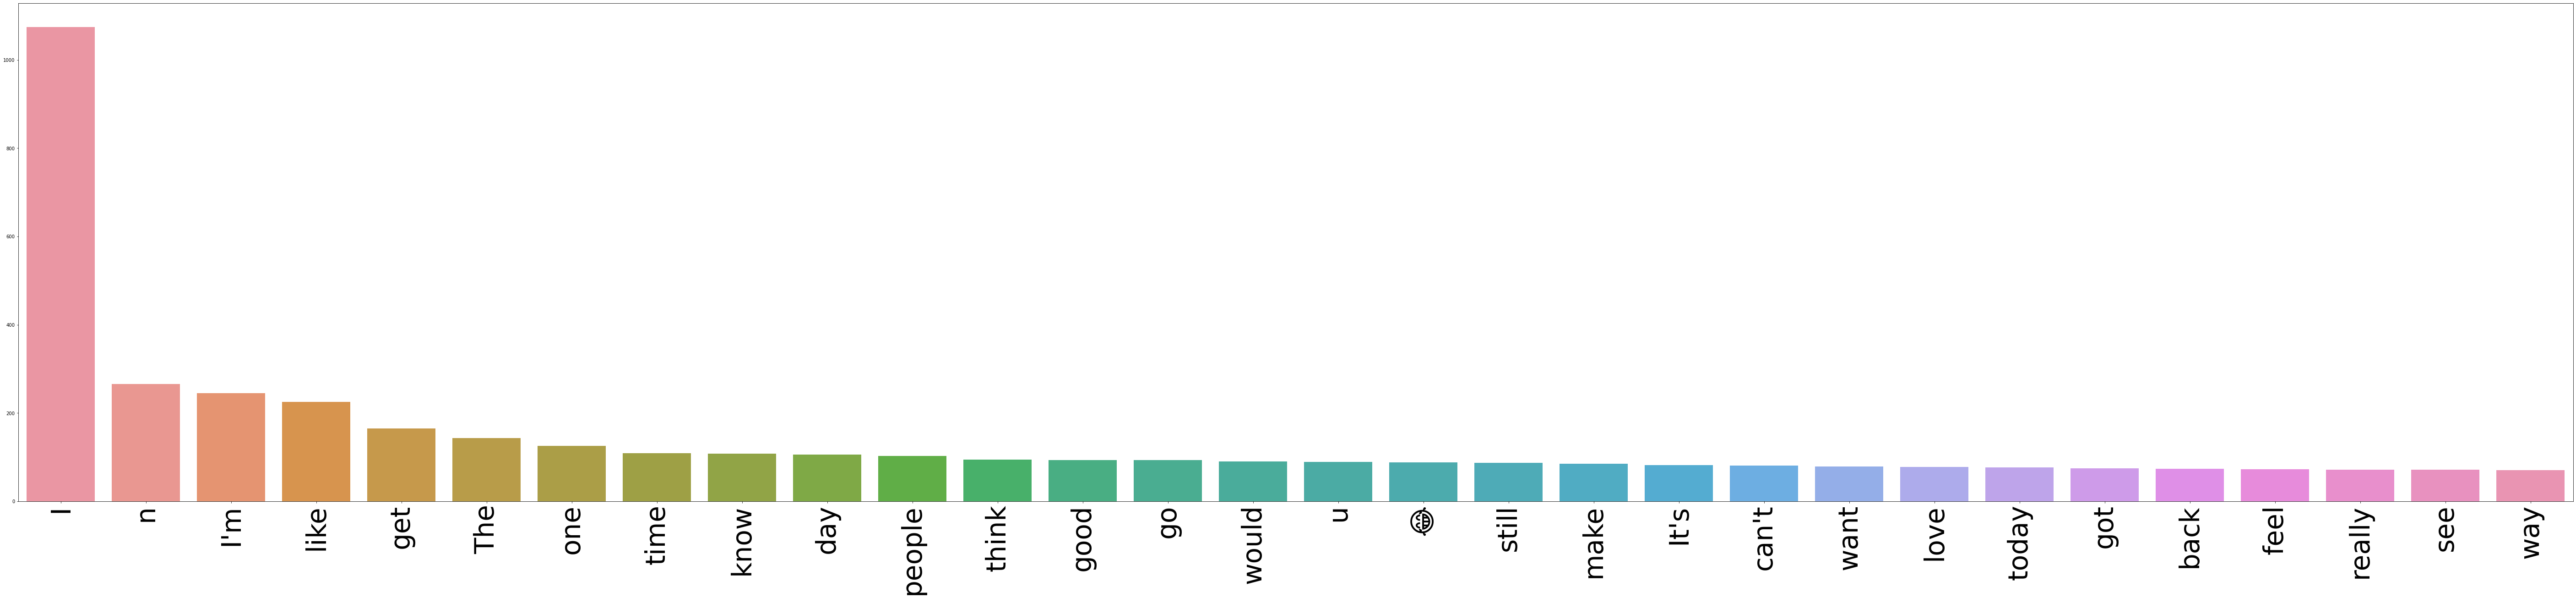

In [6]:
# Answer here
# Use NLTK TweetTokenizer for suitable tokenized result, such as "I'm", "can't" can be keep as a token, 
# but will not be separated to "I", "'m", "can", "'t".
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def plot_top_k_words(text, topn, wo_stopword=True):
    import nltk
    from nltk.corpus import stopwords
    from nltk.tokenize import TweetTokenizer
    import string
    
    string.punctuation=f'{string.punctuation}:”“….....'
    if wo_stopword:
        token = [token for token in nltk.TweetTokenizer().tokenize(text) 
                 if token not in stopwords.words("english") and token not in string.punctuation]
    else:
        token = [token for token in nltk.TweetTokenizer().tokenize(text)]
    
    token_freq = nltk.FreqDist(token) #.plot(k, cumulative = False)
    token_freq_sorted = {k: v for k, v in sorted(token_freq.items(), 
                                                               key=lambda item: item[1], 
                                                               reverse=True)}
    plt.subplots(figsize=(100, 20))
    g = sns.barplot(x=list(token_freq_sorted.keys())[:topn],
                    y=list(token_freq_sorted.values())[:topn])
    g.set_xticklabels(list(token_freq_sorted.keys())[:topn], rotation = 90, fontsize = 58);

print(f"Top 30 words frequency at Train dataset\n")
train_token_freq_sorted = plot_top_k_words(" ".join(train_df.text), 30, wo_stopword=True)


Top 30 words frequency at Test dataset



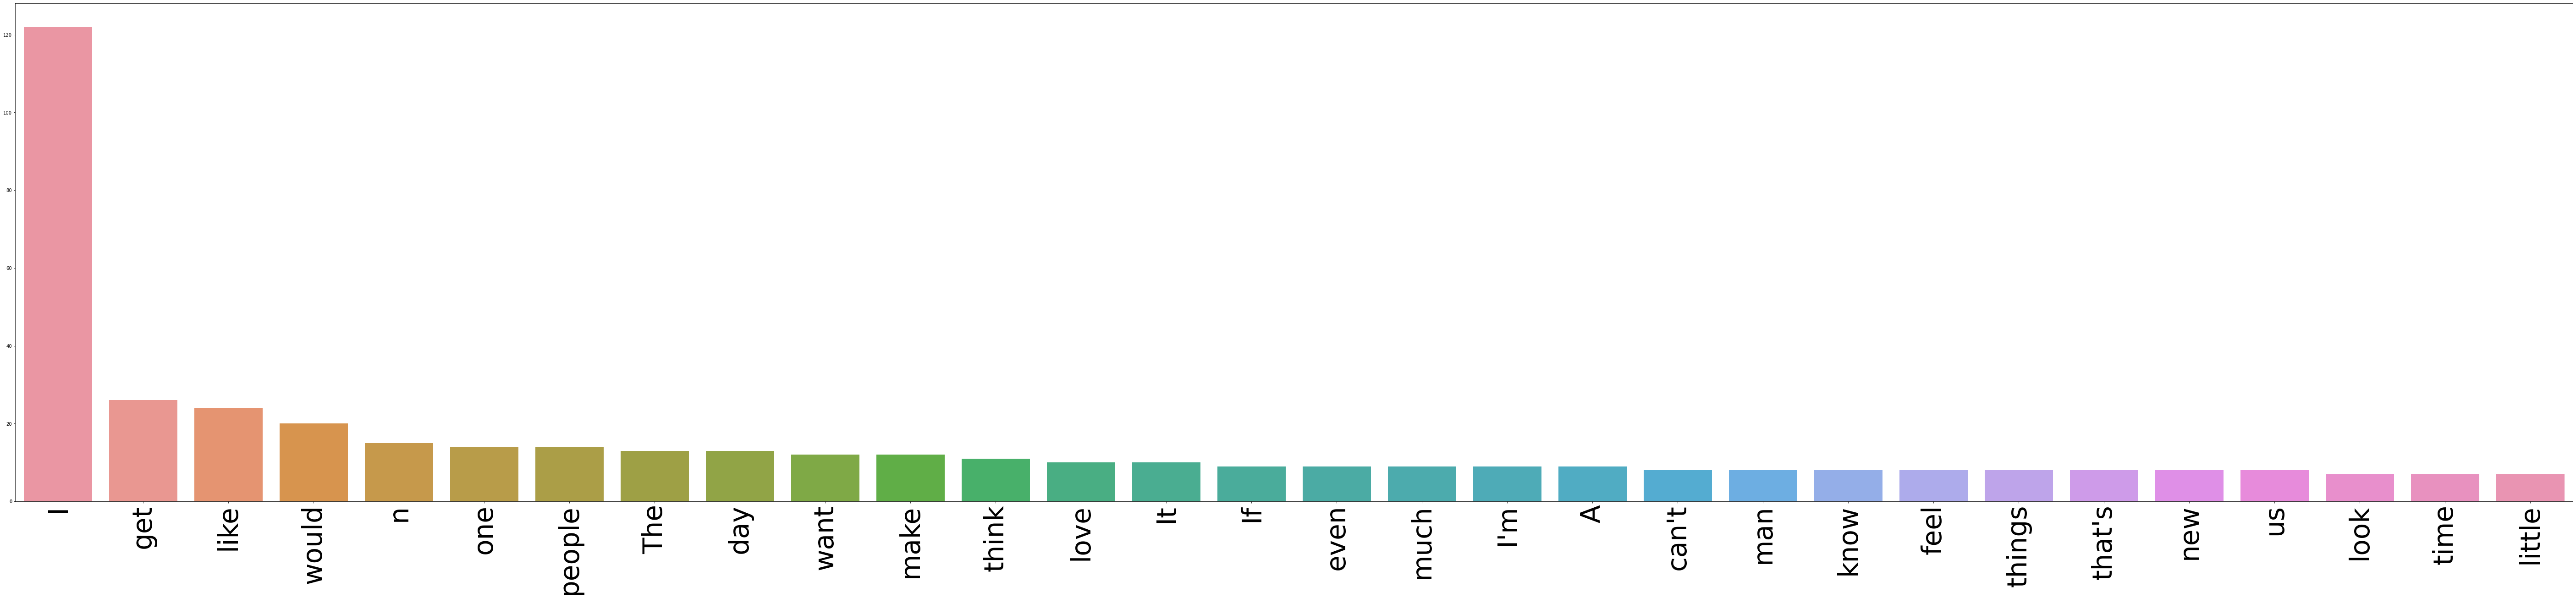

In [7]:
print(f"\nTop 30 words frequency at Test dataset\n")
plot_top_k_words(" ".join(test_df.text), 30, wo_stopword=True)

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [8]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [9]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [10]:
#group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

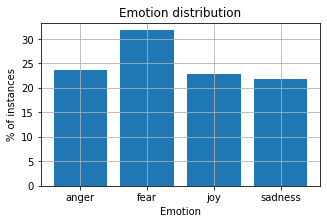

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [14]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [15]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [16]:
type(train_data_BOW_features)

scipy.sparse.csr.csr_matrix

In [17]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [19]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names()
feature_names[100:110]

['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s', '31']

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [20]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [21]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

/Applications/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(3613, 500)

In [22]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [4, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [23]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names()
feature_names_500[100:110]

['change',
 'cheer',
 'cheerful',
 'cheering',
 'cheery',
 'class',
 'come',
 'comes',
 'could',
 'country']

In [24]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [25]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer


# build analyzers (bag-of-words)
TFIDF_1k = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
TFIDF_1k.fit(train_df['text'])

train_data_TFIDF_features_1k = TFIDF_1k.transform(train_df['text'])

## check dimension
train_data_TFIDF_features_1k.shape

/Applications/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(3613, 1000)

In [26]:
train_data_TFIDF_features_1k.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.53025127, 0.08205564, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [27]:
# observe some feature names
feature_names_1k_TFIDF = TFIDF_1k.get_feature_names()
feature_names_1k_TFIDF[100:110]

['awareness',
 'away',
 'awe',
 'awesome',
 'awful',
 'b',
 'baby',
 'back',
 'bad',
 'ball']

In [28]:
"😂" in feature_names_1k_TFIDF

True

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [30]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['sadness', 'sadness', 'fear', 'anger', 'sadness', 'fear',
       'sadness', 'anger', 'anger', 'fear'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [31]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.66


In [32]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.67      0.70      0.69        84
        fear       0.67      0.65      0.66       110
         joy       0.65      0.65      0.65        79
     sadness       0.66      0.65      0.65        74

    accuracy                           0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.66      0.66      0.66       347



In [33]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[59 12 10  3]
 [15 72 10 13]
 [ 6 13 51  9]
 [ 8 10  8 48]]


In [34]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

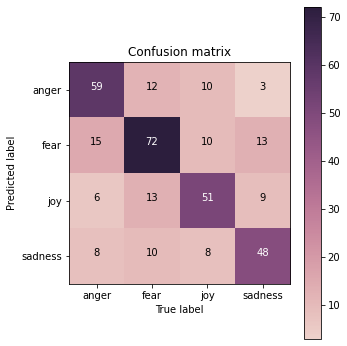

In [35]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

### Answer here
The confusion matrix show the differentiation between prediction and ground truth by each label.
For example "anger" emotion, total prediction is 84, but only 59 are true positive, there are 25 are false positive, among them, there are 12 label should be "fear", 10 "joy", 3 "sadness". By this, we can detectmize which labels' prediction is good enough or not, so we can try another approach to make better model for prediction. 

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [36]:
from sklearn.naive_bayes import MultinomialNB

## build DecisionTree model
NB_model = MultinomialNB()

## training!
NB_model = NB_model.fit(X_train, y_train)

## predict!
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['sadness', 'sadness', 'fear', 'anger', 'joy', 'fear', 'fear',
       'anger', 'anger', 'anger'], dtype='<U7')

In [37]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.79
testing accuracy: 0.69


In [38]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.72      0.77      0.75       110
         joy       0.76      0.70      0.73        79
     sadness       0.63      0.62      0.63        74

    accuracy                           0.69       347
   macro avg       0.69      0.69      0.69       347
weighted avg       0.70      0.69      0.69       347



In [39]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 15  5  9]
 [ 8 85  5 12]
 [10  8 55  6]
 [11 10  7 46]]


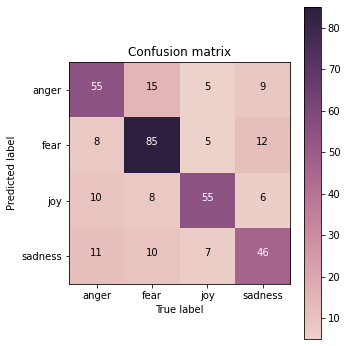

In [40]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

### Answer here

- -From the accuracy of the prediction test data set and the f1 score, we know that the performance of Naive Bayes (acc: 0.69, f1: 0.69) is better than the decision tree model (acc: 0.66, f1: 0.66)
- However, the decision tree model can predict the labels "anger" and "sad" better than the naive Bayes model, because these two labels get higher f1 scores.
- When we review the training results, the training accuracy score of the decision tree model is 0.99, while the test data result is only 0.66. It seems that the decision tree model is over-fitting and has poor performance on the test data.

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
    * Trying different features (Feature engineering)
        -Eg. Word2Vec,PCA,LDA,FastText, Clustering......
    * Trying different models
    * Analyzing your results and interpret them to improve your feature engineering/model building process
    * Iterate through the steps above until finding a satisfying result
Remember that you should also consider the task at hand and the model you'll feed the data to. 

### Try TFIDF at Naive Bayes model

The result score show better than BOW.

In [41]:
# for a classificaiton problem, you need to provide both training & testing data
X_train = TFIDF_1k.transform(train_df['text'])
y_train = train_df['emotion']

X_test = TFIDF_1k.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 1000)
y_train.shape:  (3613,)
X_test.shape:  (347, 1000)
y_test.shape:  (347,)


In [42]:
from sklearn.naive_bayes import MultinomialNB

## build DecisionTree model
NB_model = MultinomialNB()

## training!
NB_model = NB_model.fit(X_train, y_train)

## predict!
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['sadness', 'sadness', 'fear', 'anger', 'fear', 'fear', 'fear',
       'anger', 'anger', 'fear'], dtype='<U7')

In [43]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.86
testing accuracy: 0.76


In [44]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.85      0.71      0.77        84
        fear       0.66      0.92      0.77       110
         joy       0.86      0.75      0.80        79
     sadness       0.85      0.61      0.71        74

    accuracy                           0.76       347
   macro avg       0.80      0.75      0.76       347
weighted avg       0.79      0.76      0.76       347



In [45]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[ 60  18   3   3]
 [  5 101   2   2]
 [  3  14  59   3]
 [  3  21   5  45]]


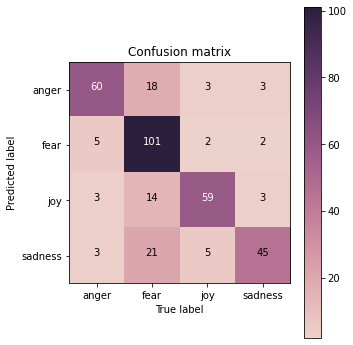

In [46]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![Fully Connected Network](pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [47]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [48]:
X_train

<3613x500 sparse matrix of type '<class 'numpy.int64'>'
	with 42486 stored elements in Compressed Sparse Row format>

### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [49]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2860    sadness
3042    sadness
1137       fear
1760       fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [50]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![Imgur](pics/pic2.png)

In [51]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                32064     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax (Softmax)            (None, 4)                

### 6.4 Train

In [52]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 [==============================] - 0s 2ms/step - loss: 1.3240 - accuracy: 0.3673 - val_loss: 1.2999 - val_accuracy: 0.4438
Epoch 2/25
113/113 [==============================] - 0s 792us/step - loss: 0.9885 - accuracy: 0.6549 - val_loss: 0.9554 - val_accuracy: 0.6225
Epoch 3/25
113/113 [==============================] - 0s 710us/step - loss: 0.5821 - accuracy: 0.7932 - val_loss: 0.8143 - val_accuracy: 0.6945
Epoch 4/25
113/113 [==============================] - 0s 733us/step - loss: 0.4120 - accuracy: 0.8447 - val_loss: 0.8114 - val_accuracy: 0.6945
Epoch 5/25
113/113 [==============================] - 0s 879us/step - loss: 0.3200 - accuracy: 0.8846 - val_loss: 0.8526 - val_accuracy: 0.6657
Epoch 6/25
113/113 [==============================] - 0s 774us/step - loss: 0.2565 - accuracy: 0.9136 - val_loss: 0.8788 - val_accuracy: 0.6945
Epoch 7/25
113/113 [==============================] - 0s 748us/step - loss: 0.2153 - accuracy: 0.9283 - val_loss: 0.9473 - val_accuracy: 0

### 6.5 Predict on testing data

In [53]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

array([[5.4140437e-06, 1.2804700e-05, 6.4454019e-02, 9.3552774e-01],
       [8.9550689e-03, 1.9221213e-06, 3.3566085e-08, 9.9104297e-01],
       [1.3432715e-09, 1.0000000e+00, 3.7157416e-11, 2.2489955e-08],
       [2.2444221e-06, 9.9989080e-01, 1.7735904e-06, 1.0518884e-04],
       [8.4945727e-03, 3.5025782e-03, 9.4114184e-01, 4.6861075e-02]],
      dtype=float32)

In [54]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['sadness', 'sadness', 'fear', 'fear', 'joy'], dtype=object)

In [55]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.67


In [56]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.367285,1.323982,0.443804,1.299890
1,1,0.654857,0.988459,0.622478,0.955369
2,2,0.793247,0.582056,0.694524,0.814284
3,3,0.844727,0.411998,0.694524,0.811420
4,4,0.884583,0.320037,0.665706,0.852626
5,5,0.913645,0.256456,0.694524,0.878795
6,6,0.928314,0.215256,0.674352,0.947297
7,7,0.944368,0.174344,0.674352,0.976687
8,8,0.954055,0.152495,0.665706,1.087416
9,9,0.962635,0.130973,0.662824,1.123916


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

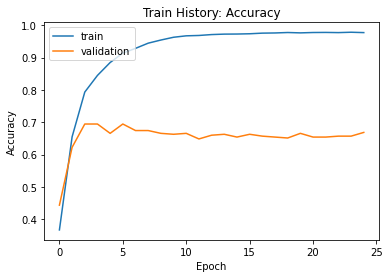

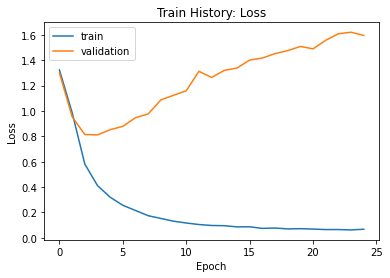

In [57]:
import matplotlib.pyplot as plt

#Training Accuracy
plt.plot(training_log.accuracy)
plt.plot(training_log.val_accuracy)
plt.title("Train History: Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["train", "validation"], loc = "upper left")
plt.show()

#Training Loss
plt.plot(training_log.loss)
plt.plot(training_log.val_loss)
plt.title("Train History: Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train", "validation"], loc = "upper left")
plt.show()


In [58]:
training_log[training_log.val_loss==min(training_log.val_loss)]

,epoch,accuracy,loss,val_accuracy,val_loss
3,3,0.844727,0.411998,0.694524,0.81142


### Answer here

From the above 2 figures, it's easy to detect the training turned to overfitting, since the training had high accuracy but validation keep around 0.7. By according to loss figure, the training have perfect low value of loss at the end but the validation turned to higher loss value after 3th epoch. Therefore, we can regard it as an overfitting situation.

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [59]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
2860,40033,"@xBFDR yeah I'm sure it will, it's just so dep...","[@, xBFDR, yeah, I, 'm, sure, it, will, ,, it,..."
3042,40215,@MxJackMonroe I couldn't get on with it either...,"[@, MxJackMonroe, I, could, n't, get, on, with..."
1137,20280,I want to slide into the dms but im too fuckin...,"[I, want, to, slide, into, the, dms, but, im, ..."
1760,20903,#aliens #zombie #gore #slash #ghost #sith #hor...,"[#, aliens, #, zombie, #, gore, #, slash, #, g..."
2536,30532,"A cheerful heart is good medicine, but a crush...","[A, cheerful, heart, is, good, medicine, ,, bu..."


In [60]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'xBFDR', 'yeah', 'I', "'m", 'sure', 'it', 'will', ',', 'it', "'s", 'just', 'so', 'depressing', 'having', 'to', 'talk', 'to', 'my', 'parents', 'over', 'the', 'phone', 'instead', 'of', 'talking', 'to', 'them', 'downstairs']),
       list(['@', 'MxJackMonroe', 'I', 'could', "n't", 'get', 'on', 'with', 'it', 'either', '.', 'Bits', 'started', 'drooping', 'that', 'should', "n't", 'droop', '.', 'GP', 'said', 'mooncup', 'alone', 'to', 'blame', '.']),
       list(['I', 'want', 'to', 'slide', 'into', 'the', 'dms', 'but', 'im', 'too', 'fucking', 'shy'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [61]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          size=vector_dim, window=window_size, 
                          min_count=min_count, iter=training_iter)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [62]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 2.16474906e-01, -3.35775286e-01, -5.82462966e-01, -2.10410148e-01,
        3.53335470e-01, -1.41628611e+00, -3.30348432e-01,  4.88505810e-02,
        9.67789069e-02, -3.99039149e-01,  9.24335346e-02, -3.05271652e-02,
        4.24912497e-02,  6.10869110e-01,  1.05487049e-01, -5.85321069e-01,
        8.08126867e-01,  5.32786012e-01, -4.62620705e-01,  4.49624747e-01,
       -1.85891840e-04, -2.12895110e-01, -1.04115054e-01, -4.98079360e-01,
       -1.40705913e-01, -4.49264884e-01,  4.22769077e-02, -3.90536338e-01,
        3.60739082e-01, -9.61684585e-01,  7.27467120e-01,  3.04198623e-01,
       -3.54737222e-01,  1.32169381e-01,  2.70165145e-01, -2.07291529e-01,
       -3.39816481e-01, -7.53802717e-01, -2.57915080e-01, -6.49009347e-02,
       -2.90920168e-01, -9.75801647e-02, -5.74640810e-01, -8.29275474e-02,
       -9.07677785e-02, -3.71713638e-01, -5.35265207e-01, -3.49731624e-01,
        6.59394085e-01,  5.15224636e-01,  3.45677406e-01, -6.99412704e-01,
       -2.72322536e-01, -

In [63]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.most_similar(word, topn=topn)

[('bday', 0.9457329511642456),
 ('Makes', 0.9414987564086914),
 ('O', 0.9311710596084595),
 ('blessed', 0.9279961585998535),
 ('birthday', 0.9276790618896484),
 ('keeping', 0.9256733655929565),
 ('Be', 0.9215212464332581),
 ('free', 0.9185193181037903),
 ('smile', 0.9184526205062866),
 ('HilltopBindery', 0.9152381420135498)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [64]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890128135681),
 ('pleased', 0.6632171273231506),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437950134277344),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247666478157043)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [65]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577817916870117),
 ('thank', 0.9376667141914368),
 ('welcome', 0.9336150288581848),
 ('love', 0.9176183938980103),
 ('miss', 0.916450023651123),
 ('hello', 0.9158351421356201),
 ('thanks', 0.9150084257125854),
 ('merry', 0.9053248763084412),
 ('bless', 0.9027323126792908),
 ('wish', 0.9013165831565857)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [66]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [67]:
## check library
import gensim
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import string

string.punctuation=f'{string.punctuation}:”“….....'

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = [" ".join([token for token in item 
                                        if token not in string.punctuation 
                                        and token not in stopwords.words("english")]) 
                                   for item in train_df["text"].map(TweetTokenizer().tokenize).values]
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
2860,40033,"@xBFDR yeah I'm sure it will, it's just so dep...",@xBFDR yeah I'm sure depressing talk parents p...
3042,40215,@MxJackMonroe I couldn't get on with it either...,@MxJackMonroe I get either Bits started droopi...
1137,20280,I want to slide into the dms but im too fuckin...,I want slide dms im fucking shy
1760,20903,#aliens #zombie #gore #slash #ghost #sith #hor...,#aliens #zombie #gore #slash #ghost #sith #hor...
2536,30532,"A cheerful heart is good medicine, but a crush...",A cheerful heart good medicine crushed spirit ...


In [68]:
## create the training corpus
test_df['text_tokenized'] = [" ".join([token for token in item 
                                       if token not in string.punctuation 
                                       and token not in stopwords.words("english")]) 
                                   for item in test_df["text"].map(TweetTokenizer().tokenize).values]
test_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
301,40814,Before the year ends I'll probably get master ...,Before year ends I'll probably get master 12s ...
295,40808,If Angelina Jolie can't keep a man no one can....,If Angelina Jolie can't keep man one Today mou...
141,21204,I have been seeing terrible terrible prescript...,I seeing terrible terrible prescriptions week ...
69,10926,If I spend even 5 minutes with you and you alr...,If I spend even 5 minutes already irritate I s...
202,30831,Google caffeine-an sprightly lengthening into ...,Google caffeine-an sprightly lengthening corri...


In [69]:
from keras.models import Model
from keras.layers import Input, Dense, Flatten
from keras.layers import ReLU, Softmax
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
from keras.callbacks import CSVLogger
from keras.preprocessing import sequence
from keras.utils import np_utils


max_seq_len = 50
max_num_vocab = len(w2v_google_model.wv.vocab)
tokenizer = Tokenizer(num_words = 10000, lower=True, split=" ", char_level=False)

csv_logger = CSVLogger('logs/exercise_7_training_log.csv')

# training setting
epochs = 25 
batch_size = 8 

train_data = np.array(train_df.text_tokenized.values)
test_data= np.array(test_df.text_tokenized.values)

#tokenizer = Tokenizer(num_words = num_words, lower=True, split=" ", char_level=False)
tokenizer.fit_on_texts(train_data)
x_train_seq = tokenizer.texts_to_sequences(train_data)
x_train = sequence.pad_sequences(x_train_seq, maxlen = max_seq_len)
x_test_seq = tokenizer.texts_to_sequences(test_data)
x_test = sequence.pad_sequences(x_test_seq, maxlen = max_seq_len)

y_train = label_encode(label_encoder, train_df.emotion.values)
y_test = label_encode(label_encoder, test_df.emotion.values)


#pre-train word embedding
word_index = tokenizer.word_index
num_words = min(max_num_vocab, len(word_index) + 1)
EMBEDDING_DIM = w2v_google_model.wv["happy"].shape[0]
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= num_words: #m_max_num_vocab:
        continue
    embedding_vector = w2v_google_model.wv["word"]
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

# Model
# input layer
input_shape = max_seq_len
model_input = Input(shape=(input_shape, ), dtype='float64')# 500
embedder1 = Embedding(num_words, 
                      EMBEDDING_DIM, 
                      input_length=input_shape, 
                      weights=[embedding_matrix], 
                      trainable=False)

X = Flatten()(embedder1(model_input))

# 1st hidden layer
X_W1 = Dense(units=512)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=256)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=model_input, outputs=model_output)

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

# training!
history = model.fit(x_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (x_test, y_test),
                    verbose = 1)
print('training finish')

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 50, 300)           3157200   
_________________________________________________________________
flatten (Flatten)            (None, 15000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               7680512   
_________________________________________________________________
re_lu_2 (ReLU)               (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
re_lu_3 (ReLU)               (None, 256)              

In [70]:
## predict
pred_result = model.predict(x_test, batch_size=8)
pred_result[:5]

array([[0.24115632, 0.3056673 , 0.23432542, 0.21885091],
       [0.24115632, 0.3056673 , 0.23432542, 0.21885091],
       [0.24115632, 0.3056673 , 0.23432542, 0.21885091],
       [0.24115632, 0.3056673 , 0.23432542, 0.21885091],
       [0.24115632, 0.3056673 , 0.23432542, 0.21885091]], dtype=float32)

In [71]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'fear', 'fear', 'fear', 'fear'], dtype=object)

In [72]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.3


In [73]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/exercise_7_training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.296153,1.404568,0.299712,1.389741
1,1,0.314974,1.376293,0.299712,1.398477
2,2,0.318018,1.373666,0.296830,1.397086
3,3,0.319956,1.372477,0.299712,1.416135
4,4,0.318295,1.372784,0.299712,1.405226
5,5,0.320509,1.371969,0.299712,1.413639
6,6,0.320509,1.371869,0.296830,1.445384
7,7,0.320232,1.371963,0.296830,1.441020
8,8,0.318849,1.371992,0.299712,1.432745
9,9,0.319679,1.371985,0.299712,1.427188


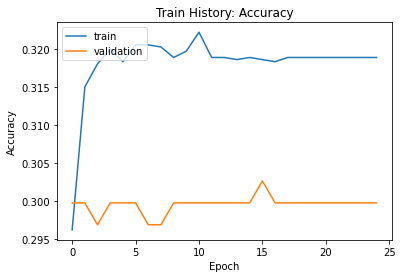

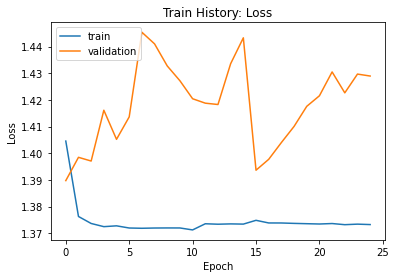

In [74]:
import matplotlib.pyplot as plt

#Training Accuracy
plt.plot(training_log.accuracy)
plt.plot(training_log.val_accuracy)
plt.title("Train History: Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["train", "validation"], loc = "upper left")
plt.show()

#Training Loss
plt.plot(training_log.loss)
plt.plot(training_log.val_loss)
plt.title("Train History: Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train", "validation"], loc = "upper left")
plt.show()



### 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [75]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [76]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


![Imgur](pics/pic6.png)

In [77]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

In [78]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)


## 9. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, tf-idf, or word2vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient...

Our aim will be to create a visualization similar to the one below:

![Image](pics/pic7.png)
source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

Here we would like to introduce another visualization method called t-SNE.  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 

### 9.1 Prepare visualizing target

Let's repare data lists like:
    - happpy words
    - angry words
    - data words
    - mining words

In [79]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.1 Plot using t-SNE (2-dimension)

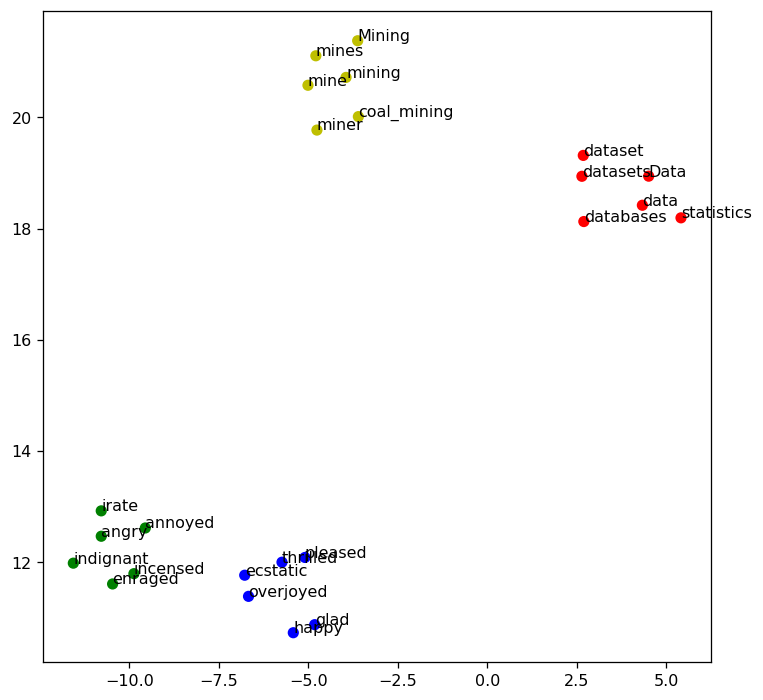

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [81]:
word_list = ["angry", "happy", "sad", "fear"]

topn = 15
target_words = []
for item in word_list:
    t_words = f'{item}_words'
    t_words = [item] + [word_ for word_, sim_ in w2v_google_model.most_similar(item, topn=topn)]
    print(f'{item}_words: {t_words}\n')
    target_words.extend(t_words)

print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

angry_words: ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']

happy_words: ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']

sad_words: ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']

fear_words: ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']


target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'e

### Plot using t-SNE (2-dimension)

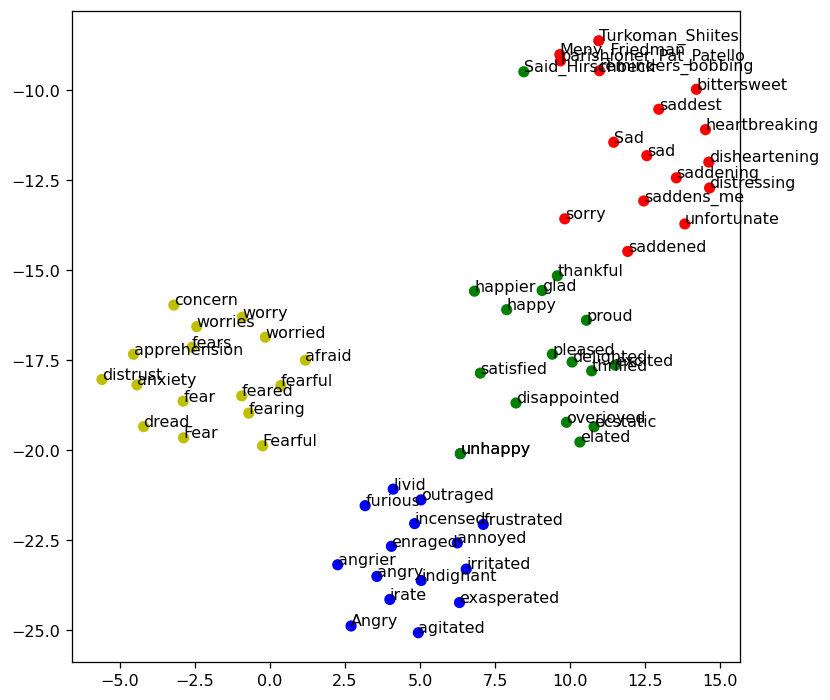

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# Kaggle Competition

## K_1.Preprocessing

In [1]:
# load raw data from json
import pandas as pd

df = pd.read_json('./kaggle/tweets_DM.json', lines=True)

In [2]:
# seperate hashtags, tweet_id, tweet_text from _source column
tweet_hashtags = []
tweet_tweet_id = []
tweet_text = []
for item in df._source:
    tweet_hashtags.append(item["tweet"]["hashtags"])
    tweet_tweet_id.append(item["tweet"]["tweet_id"])
    tweet_text.append(item["tweet"]["text"])
    #break

df["hashtags"] = tweet_hashtags
df["tweet_id"] = tweet_tweet_id
df['tweet_text'] = tweet_text

In [3]:
# load user and emotion raw data
import pandas as pd

df_user = pd.read_csv("./kaggle/data_identification.csv", encoding='utf-8')
df_emotion = pd.read_csv('./kaggle/emotion.csv', encoding='utf-8')

In [4]:
df_user.head(3)

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train


In [5]:
df_emotion.head(3)

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation


In [6]:
df.head(3)

,_score,_index,_source,_crawldate,_type,hashtags,tweet_id,tweet_text
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."


In [7]:
# merge df and df_user dataframe to match each tweet_text, tweet_id and identification, 
# so we can know which row is located as train data or test data.

df = pd.merge(df, df_user, on='tweet_id')

In [8]:
# use "identification" column to seperate training data and test data to 2 independent dataframe
df_train = df[df["identification"] == "train"]
df_test = df[df["identification"] == "test"]

In [9]:
# merge df_train and df_emotion to match each tweet_id and emotion.
df_train = pd.merge(df_train, df_emotion, on='tweet_id')

In [11]:
# presetting emotion column at df_test 
df_test["emotion"] = ""

<ipython-input-11-75b7a92f1ce2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["emotion"] = ""


In [13]:
%%time
# tokenize tweet_text by nltk TweetTokenizer()
# such as "I'm", "can't" can be keep as a token, 
# but will not be separated to "I", "'m", "can", "'t".
# filter out stopwords

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import string

punctuation_extra = '''!!!"""###$$$$%%%%&&&&\\\'''''''()*+,-....../:;<=>?@[\\]^_`{|}~”“………::::’'''
string.punctuation = f'{string.punctuation}{punctuation_extra}'

df_train["tweet_text_clean"] = [" ".join([token for token in item 
                                          if token not in string.punctuation 
                                          and token not in stopwords.words("english")]) 
                                   for item in df_train["tweet_text"].map(TweetTokenizer().tokenize).values]
df_test["tweet_text_clean"] = [" ".join([token for token in item 
                                         if token not in string.punctuation 
                                         and token not in stopwords.words("english")]) 
                                   for item in df_test["tweet_text"].map(TweetTokenizer().tokenize).values]

CPU times: user 29min 10s, sys: 1min 58s, total: 31min 9s
Wall time: 31min 10s


<timed exec>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [14]:
# save dataframe to pickle file
df_train.to_pickle("./kaggle/df_train.pkl")
df_test.to_pickle("./kaggle/df_test.pkl")

## Load data pickle file

In [15]:
import pandas as pd

df_train = pd.read_pickle("./kaggle/df_train.pkl")
df_test = pd.read_pickle("./kaggle/df_test.pkl")


In [16]:
df_train.head(3)

,_score,_index,_source,_crawldate,_type,hashtags,tweet_id,tweet_text,identification,emotion,tweet_text_clean
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation,People post add #Snapchat must dehydrated Cuz ...
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness,@brianklaas As see Trump dangerous #freepress ...
2,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear,Now ISSA stalking Tasha 😂 😂 😂 <LH>


In [17]:
df_test.head(3)

,_score,_index,_source,_crawldate,_type,hashtags,tweet_id,tweet_text,identification,emotion,tweet_text_clean
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test,,Confident obedience I write knowing even I ask...
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets,[],0x2de201,"""Trust is not the same as faith. A friend is s...",test,,Trust faith A friend someone trust Putting fai...
9,66,hashtag_tweets,"{'tweet': {'hashtags': ['materialism', 'money'...",2015-09-09 09:22:55,tweets,"[materialism, money, possessions]",0x218443,When do you have enough ? When are you satisfi...,test,,When enough When satisfied Is goal really mone...


In [18]:
# dict for mapping emotion to digi label
dict_emotion = {'anger':0, 'anticipation':1, 'disgust':2, 
                'fear':3, 'joy':4, 'sadness':5, 'surprise':6, 'trust':7}
dict_emotion_reverse = {0:'anger', 1:'anticipation', 2:'disgust', 
                        3:'fear', 4:'joy', 5:'sadness', 6:'surprise', 7:'trust'}

df_train["label"] = df_train["emotion"].map(lambda x:dict_emotion[x])

In [19]:
df_train["emotion_label"] = df_train.emotion+"_"+df_train.label.astype(str)

Text(0.5, 1.0, 'Percentage of tweets be classified to')

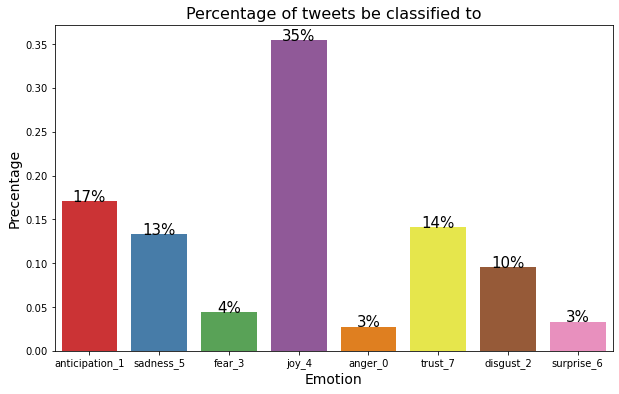

In [20]:
#Ploting barplot for target 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
g = sns.barplot(df_train["emotion_label"], df_train.index, 
                palette='Set1', estimator=lambda x: len(x) / len(df_train) )

#Anotating the graph
for p in g.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    g.text(x+width/2, y+height, '{:.0%}'.format(height), 
           horizontalalignment='center',fontsize=15)

#Setting the labels
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Precentage', fontsize=14)
plt.title('Percentage of tweets be classified to', fontsize=16)

In [21]:
# by previous figure told me the training dataset is an imbalance dataset, prepare the sample_weight
# for coming use.

from sklearn.utils.class_weight import compute_sample_weight

df_train["sample_weight"] = compute_sample_weight(class_weight='balanced', y=df_train["label"])

In [22]:
df_train.sample_weight.value_counts()

0.352596    516017
0.730895    248935
0.885474    205478
0.940592    193437
1.308009    139101
2.842941     63999
3.733821     48729
4.563809     39867
Name: sample_weight, dtype: int64

## K_2.attempting to get the distribution of each emotion label by pseudo answers.
anger: 0.03901<br>
anticipation: 0.12506<br>
disgut: 0.13798<br>
fear: 0.03991<br>
joy: 0.30614<br>
sadness: 0.18498<br>
surprise: 0.03514<br>
trust: 0.13175<br>

compare to above figure, similar with the training dataset distribution. so, we will not use sample_weight.

## K_3.Naive Base

In [24]:
# performance output function
def PerformanceOutput(expected, predicted):
    print(metrics.classification_report(expected, predicted))
    print("Marco-AVG    PRF: {:0.3f}, {:0.3f}, {:0.3f}".format(
        metrics.precision_score(expected, predicted, average = "macro"),
        metrics.recall_score(expected, predicted, average = "macro"),
        metrics.f1_score(expected, predicted, average = "macro")))
    
    print("Micro-AVG    PRF: {:0.3f}, {:0.3f}, {:0.3f}".format(
        metrics.precision_score(expected, predicted, average = "micro"),
        metrics.recall_score(expected, predicted, average = "micro"),
        metrics.f1_score(expected, predicted, average = "micro")))
    
    print("Weighted-AVG PRF: {:0.3f}, {:0.3f}, {:0.3f}".format(
        metrics.precision_score(expected, predicted, average = "weighted"),
        metrics.recall_score(expected, predicted, average = "weighted"),
        metrics.f1_score(expected, predicted, average = "weighted")))
    
    print(f"\nConfusion Matrix\n{metrics.confusion_matrix(expected, predicted)}")
    
    
def PerformanceOutputToFile(classifier, expected, predicted):
    with open("./Result/kaggle_PerformanceOutput.txt", "a") as text_file:
        print("Classifier: {}".format(classifier), file=text_file)
        print(metrics.classification_report(expected, predicted), file=text_file)
        print("Marco-AVG    PRF: {:0.3f}, {:0.3f}, {:0.3f}".format(
            metrics.precision_score(expected, predicted, average = "macro"),
            metrics.recall_score(expected, predicted, average = "macro"),
            metrics.f1_score(expected, predicted, average = "macro")), file=text_file)

        print("Micro-AVG    PRF: {:0.3f}, {:0.3f}, {:0.3f}".format(
            metrics.precision_score(expected, predicted, average = "micro"),
            metrics.recall_score(expected, predicted, average = "micro"),
            metrics.f1_score(expected, predicted, average = "micro")), file=text_file)

        print("Weighted-AVG PRF: {:0.3f}, {:0.3f}, {:0.3f}".format(
            metrics.precision_score(expected, predicted, average = "weighted"),
            metrics.recall_score(expected, predicted, average = "weighted"),
            metrics.f1_score(expected, predicted, average = "weighted")), file=text_file)

        print("Confusion Matrix", "\n", metrics.confusion_matrix(expected, predicted), 
              file=text_file)
        print("======================================================================", 
              "\n", file=text_file)

In [26]:
%%time

# after several experiments, the ComplementNB perform better than MultinomialNB
# and OneVsRestClassifier(MultinomialNB)
# so the ipynb will only keep this.

# 10-Fold is used.
# after try, the 4 grams can make better performance than trigram, bigram etc.

from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
import numpy as np
import nltk
from nltk.tokenize import TweetTokenizer


#classifier_nb_tfidf = OneVsRestClassifier(ComplementNB())
#classifier_nb_tfidf = OneVsOneClassifier(MultinomialNB())
classifier_nb_tfidf = ComplementNB()

kf = KFold(n_splits = 10, shuffle = True)
tfidf_vectorizer = TfidfVectorizer(max_features=2888888,
                                   ngram_range=[1, 4], 
                                   tokenizer=nltk.TweetTokenizer().tokenize)

expected_nb_tfidf = []
predicted_nb_tfidf = []

i = 0
for train_index, test_index in kf.split(df_train.index):
    train_data = df_train.iloc[train_index]["tweet_text_clean"].values
    test_data = df_train.iloc[test_index]["tweet_text_clean"].values
    y_train = df_train.iloc[train_index]["label"].values
    #y_train_sample_weight = df_train.iloc[train_index]["sample_weight"].values
    y_test = df_train.iloc[test_index]["label"].values
    
    # TF-IDF
    x_train_tfidf = tfidf_vectorizer.fit_transform(train_data)
    x_test_tfidf = tfidf_vectorizer.transform(test_data)
    classifier_nb_tfidf.fit(x_train_tfidf, y_train) 
    #, sample_weight=y_train_sample_weight
    
    # make predicitions
    expected_nb_tfidf.extend(y_test)
    predicted_nb_tfidf.extend(classifier_nb_tfidf.predict(x_test_tfidf))
    
    i += 1
    print(f"\n###### {i} ######\n")
    PerformanceOutput(expected_nb_tfidf, predicted_nb_tfidf)
    
# make predictions: TFIDF
print(f'{"TFIDF Performance":=^60}\n')
PerformanceOutput(expected_nb_tfidf, predicted_nb_tfidf)
PerformanceOutputToFile("ComplementNB_3.88M_4gram_TweetTokenizer_clean", 
                        expected_nb_tfidf, predicted_nb_tfidf)


###### 1 ######

              precision    recall  f1-score   support

           0       0.70      0.25      0.37      4049
           1       0.68      0.61      0.64     24820
           2       0.49      0.46      0.48     14071
           3       0.69      0.45      0.55      6274
           4       0.60      0.83      0.70     51218
           5       0.52      0.57      0.54     19470
           6       0.75      0.26      0.39      4859
           7       0.65      0.35      0.46     20796

    accuracy                           0.60    145557
   macro avg       0.64      0.47      0.51    145557
weighted avg       0.61      0.60      0.59    145557

Marco-AVG    PRF: 0.636, 0.473, 0.514
Micro-AVG    PRF: 0.601, 0.601, 0.601
Weighted-AVG PRF: 0.613, 0.601, 0.586

Confusion Matrix
[[ 1003   178   719    55   992   978    12   112]
 [   49 15058   730   197  6677  1228    48   833]
 [   95   517  6527   186  2820  3548    84   294]
 [   18   408   376  2834  1733   678    40   

### K_3 Naive Bayes: Predict TEST Data

In [27]:
%%time
# Train by full training dataset and predict TEST dataset

from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
import nltk
from nltk.tokenize import TweetTokenizer

#classifier_nb_tfidf = OneVsRestClassifier(ComplementNB())
classifier_nb_tfidf = ComplementNB()

tfidf_vectorizer = TfidfVectorizer(max_features=2888888, 
                                   ngram_range=[1, 4], 
                                   tokenizer=nltk.TweetTokenizer().tokenize)

train_data = df_train["tweet_text_clean"].values
TEST_data = df_test["tweet_text_clean"].values
y_train = df_train["label"].values
#y_TEST = df_test["label"].values

# TF-IDF
x_train_tfidf = tfidf_vectorizer.fit_transform(train_data)
x_TEST_tfidf = tfidf_vectorizer.transform(TEST_data)
classifier_nb_tfidf.fit(x_train_tfidf, y_train)

# make predicitions
TEST_predict_result = classifier_nb_tfidf.predict(x_TEST_tfidf)

# reverse label to emotion term
df_test["emotion"] = [dict_emotion_reverse.get(item) for item in TEST_predict_result]

# output result to csv file
df_test[["tweet_id", "emotion"]].to_csv('./kaggle/ComplementNB_2.88M_4gram_120701.csv', 
                                        header=["id", "emotion"], 
                                        index=False, encoding="utf-8")

CPU times: user 2min 45s, sys: 10.9 s, total: 2min 56s
Wall time: 2min 56s


In [28]:
import joblib

# now you can save it to a file
joblib.dump(classifier_nb_tfidf, 'classifier_nb_tfidf_ComplementNB_2.88M_4gram_120701.pkl') 

# and later you can load it
#classifier_nb_tfidf = joblib.load('classifier_nb_tfidf.pkl')

['classifier_nb_tfidf_ComplementNB_2.88M_4gram_120701.pkl']

## The Naive Bayes method make best prediction score is: 0.48071

That score only make me at the learderboard from 15 ~ 20, so we need try another one.

## K_4.textCNN Model

In [24]:
# Training Data

import random
import keras
from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras import optimizers
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Embedding, Activation, merge, Input, Lambda, Reshape
from keras.layers import Convolution1D, GlobalMaxPooling1D, Flatten, Dropout, MaxPool1D
from keras.layers import GlobalAveragePooling1D
from keras.layers.merge import concatenate
from keras.callbacks import ModelCheckpoint


m_max_seq_len_1 = 256
m_max_num_vocab = len(embeddings_index) 
tokenizer = Tokenizer(num_words = 2000000, lower=True, split=" ", char_level=False)
EMBEDDING_DIM = 200
output_neuron = 8
batch_size = 64
epochs = 50 

predicted = []
expected = []

# use k-fold to seperate train data and eval data
kf = KFold(n_splits = 10, shuffle = True)
for x in kf.split(df_train.index):
    train_index = x[0]
    test_index = x[1]
    break

train_data = np.array(df_train.iloc[train_index]["tweet_text_clean"].str.lower().values)
test_data = np.array(df_train.iloc[test_index]["tweet_text_clean"].str.lower().values)
y_train = np.array(df_train.iloc[train_index]["label"].values)
y_test = np.array(df_train.iloc[test_index]["label"].values)

tokenizer.fit_on_texts(train_data)
x_train_seq = tokenizer.texts_to_sequences(train_data)
x_train = sequence.pad_sequences(x_train_seq, maxlen = m_max_seq_len_1)
x_test_seq = tokenizer.texts_to_sequences(test_data)
x_test = sequence.pad_sequences(x_test_seq, maxlen = m_max_seq_len_1)

y_trainOneHot = np_utils.to_categorical(y_train)
y_testOneHot = np_utils.to_categorical(y_test)

model = get_cnn_model(output_neuron, m_max_num_vocab, m_max_seq_len_1)

best_model_path = f'./params/kaggle_TweetTokenizer_{EMBEDDING_DIM}DIM_{batch_size}batch_{epochs}epochs.hdf5'
checkpoint = ModelCheckpoint(best_model_path, 
                             monitor = 'val_accuracy', 
                             verbose = 1, 
                             save_best_only = True, 
                             mode = 'max')
#callbacks_list = [checkpoint]

train_history = model.fit([x_train], y_trainOneHot, 
                          batch_size = batch_size, epochs = epochs, verbose = 1, 
                          #class_weight = class_weight,
                          validation_data=([x_test], y_testOneHot),
                          #validation_split = 0.1,
                          callbacks=[checkpoint])
                          
model.load_weights(best_model_path)
predicted.extend(model.predict([x_test]).argmax(axis=-1))
# predicted.extend(model.predict([x_test_contents, x_test_title]).argmax(axis=-1))
expected.extend(y_test)


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256)]        0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 256, 200)     143848000   input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_12 (Conv1D)              (None, 256, 256)     153856      embedding_2[0][0]                
__________________________________________________________________________________________________
conv1d_14 (Conv1D)              (None, 256, 256)     205056      embedding_2[0][0]                
____________________________________________________________________________________________

### textCNN only get the score around 0.45734

## K_5.biLSTM Model

In [17]:
def get_bilstm_model(output_neuron, max_num_vocab, max_seq_len, EMBEDDING_DIM):
    # load pre-trained embedding: prepare embedding matrix
    word_index = tokenizer.word_index
    num_words = min(max_num_vocab, len(word_index) + 1)
    embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
    for word, i in word_index.items():
        if i >= max_num_vocab:
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector    
    
    input2 = Input(shape=(max_seq_len,), dtype='float64')
    embedder = Embedding(num_words, 
                         EMBEDDING_DIM, 
                         input_length=max_seq_len, 
                         weights=[embedding_matrix], 
                         trainable=False)
    embed2 = embedder(input2)
    
    rnn2_1 = Bidirectional(LSTM(256, dropout=0.2, recurrent_dropout=0.1))(embed2)
    fc2 = Dense(256)(rnn2_1) #version1: 128
    
    #input_add = Input(shape=(train_add_features.shape[1],))
    #merged_model = concatenate([fc1, fc2, input_add]) #[fc1, fc2, input_add]
    # merged_model = concatenate([fc1, fc2])
    # bn = BatchNormalization()(merged_model)
    #drop3 = Dropout(0.33)(fc1)#(merged_model)
    #fc3 = Dense(256)(drop3) #128
    
    act = Activation('relu')(fc2) #(fc3)
    drop4 = Dropout(0.33)(act)
    fc4 = Dense(128)(drop4) #64
    
    act1 = Activation('relu')(fc4)
    drop5 = Dropout(0.33)(act1)
    fc5 = Dense(64)(drop5) #32
    #bn2 = BatchNormalization()(fc2)

    act2 = Activation('relu')(fc5)
    drop6 = Dropout(0.33)(act2)
    fc6 = Dense(32)(drop6)
    
    main_output = Dense(units = output_neuron, activation='softmax')(fc6)

    model = Model(inputs = [input2], outputs = main_output)
    #model = Model(inputs = [input1, input2, input_add], outputs = main_output)
    # model = Model(inputs = [input1, input2], outputs = main_output)

    model.summary()
    model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
    
    return model

In [ ]:
# Training Data

import random
import keras
from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras import optimizers
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Embedding, Activation, merge, Input, Lambda, Reshape
from keras.layers import Convolution1D, GlobalMaxPooling1D, Flatten, Dropout, MaxPool1D
from keras.layers import GlobalAveragePooling1D
from keras.layers import LSTM, GRU, TimeDistributed, Bidirectional, BatchNormalization
from keras.layers.merge import concatenate

#from keras.utilities.layers import Attention

from keras.callbacks import ModelCheckpoint

# input_content_1 = contents
# input_content_2 = title
max_seq_len = 228
#m_max_seq_len_2 = 14
max_num_vocab = len(embeddings_index) 
tokenizer = Tokenizer(num_words = 10000, lower=True, split=" ", char_level=False)
EMBEDDING_DIM = 200
output_neuron = 8
batch_size = 256
epochs = 20 

predicted = []
expected = []

# use k-fold to seperate train data and eval data
kf = KFold(n_splits = 10, shuffle = True)
for x in kf.split(df_train.index):
    train_index = x[0]
    test_index = x[1]
    break

train_data = np.array(df_train.iloc[train_index]["tweet_text_clean"].values)
test_data = np.array(df_train.iloc[test_index]["tweet_text_clean"].values)
y_train = np.array(df_train.iloc[train_index]["label"].values)
y_test = np.array(df_train.iloc[test_index]["label"].values)

tokenizer.fit_on_texts(train_data)
x_train_seq = tokenizer.texts_to_sequences(train_data)
x_train = sequence.pad_sequences(x_train_seq, maxlen = max_seq_len)
x_test_seq = tokenizer.texts_to_sequences(test_data)
x_test = sequence.pad_sequences(x_test_seq, maxlen = max_seq_len)

y_trainOneHot = np_utils.to_categorical(y_train)
y_testOneHot = np_utils.to_categorical(y_test)

model = get_bilstm_model(output_neuron, max_num_vocab, max_seq_len, EMBEDDING_DIM)

best_model_path = f'./params/kaggle_biLSTM_{EMBEDDING_DIM}DIM_{batch_size}batch_{epochs}epochs.hdf5'
checkpoint = ModelCheckpoint(best_model_path, 
                             monitor = 'val_accuracy', 
                             verbose = 1, 
                             save_best_only = True, 
                             mode = 'max')
#callbacks_list = [checkpoint]

train_history = model.fit([x_train], y_trainOneHot, 
                          batch_size = batch_size, epochs = epochs, verbose = 1, 
                          #class_weight = class_weight,
                          validation_data=([x_test], y_testOneHot),
                          #validation_split = 0.1,
                          callbacks=[checkpoint])
# train_history = model.fit([x_train_contents, x_train_title], y_trainOneHot, 
#                           batch_size = 100, epochs = 100, verbose = 2, 
#                           validation_data=([x_test_contents, x_test_title], y_testOneHot), 
#                           callbacks=callbacks_list)
                          
model.load_weights(best_model_path)
predicted.extend(model.predict([x_test]).argmax(axis=-1))
# predicted.extend(model.predict([x_test_contents, x_test_title]).argmax(axis=-1))
expected.extend(y_test)


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 228)]             0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 228, 200)          164612800 
_________________________________________________________________
bidirectional_2 (Bidirection (None, 512)               935936    
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_6 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               3289

### biLSTM only get the score around 0.46007

## K_6.BERT Model

### use SimpleTransformers package to implement.
- The pretrain model type is "Roberta", and the model name is "roberta-base"
- and we get the score "0.53300" that push the rank to 14th at the public leaderboard.
- finally, the final score "0.53573" up us to 13th at the private leaderboard.

### due to the training cost much time and contrain huge file, so I just put code for showing but not run here.

In [ ]:
from simpletransformers.classification import ClassificationModel
import pandas as pd
import logging
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# use k-fold to seperate train data and eval data
kf = KFold(n_splits = 10, shuffle = True)
for x in kf.split(df_train.index):
    train_index = x[0]
    test_index = x[1]
    break

train_df = df_train.iloc[train_index][["tweet_text_clean", "label"]]
eval_df = df_train.iloc[test_index][["tweet_text_clean", "label"]]

# Create a ClassificationModel
#'bert', 'bert-base-cased'
model = ClassificationModel(model_type='roberta', 
                            model_name='roberta-base', 
                            num_labels=8, 
                            args={"max_seq_length": 100,
                                  "train_batch_size": 128,
                                  "eval_batch_size": 128,
                                  "num_train_epochs": 3,
                                  "evaluate_during_training": True,
                                  'reprocess_input_data': True, 
                                  'overwrite_output_dir': True,
                                  'out_dir': 'outputs', 
                                  'best_model_dir': 'outputs/best_model'})#,
                                  #'cuda_device': 3})
# You can set class weights by using the optional weight argument

# Train the model
model.train_model(train_df, eval_df=eval_df, verbose=True, 
                 accuracy=lambda truth, predictions: accuracy_score(
                     truth, [round(p) for p in predictions]),
                 )

# Evaluate the model
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')
    
result, model_outputs, wrong_predictions = model.eval_model(eval_df, 
                                                            f1=f1_multiclass, 
                                                            acc=accuracy_score)

#predictions, raw_outputs = model.predict(["Some arbitary sentence"])
# Predict TEST data

TEST_predict_result, TEST_raw_outputs = model.predict(df_test["tweet_text_clean"].values)
df_test["emotion"] = [dict_emotion_reverse.get(item) for item in TEST_predict_result]
df_test[["tweet_id", "emotion"]].to_csv('../kaggle/ROBERTA_base_100len_128batch_3epoch_120806.csv', 
                                        index=False,
                                        header=["id", "emotion"])


wandb: WARNING Path /mnt/nas/wyeh/DM_LAB2/ROBERTA_BASE_3/wandb/ wasn't writable, using system temp directory
wandb: WARNING Path /mnt/nas/wyeh/DM_LAB2/ROBERTA_BASE_3/wandb/ wasn't writable, using system temp directory
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Rob

/home/wyeh/anaconda3/envs/py38/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)
/home/wyeh/anaconda3/envs/py38/lib/python3.8/site-packages/simpletransformers/classification/classification_model.py:900: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### k_6: Predict TEST Data by best saved model

In [16]:
# Predict TEST data by best saved model

model = ClassificationModel(model_type='roberta', 
                            model_name='outputs/best_model', 
                            num_labels=8, 
                            args={"max_seq_length": 100,
                                  "train_batch_size": 128,
                                  "eval_batch_size": 128,
                                  "num_train_epochs": 3,
                                  "evaluate_during_training": True,
                                  'reprocess_input_data': True, 
                                  'overwrite_output_dir': True,
                                  'out_dir': 'outputs', 
                                  'best_model_dir': 'outputs/best_model'})#,

TEST_predict_result, TEST_raw_outputs = model.predict(df_test["tweet_text_clean"].values)
df_test["emotion"] = [dict_emotion_reverse.get(item) for item in TEST_predict_result]
df_test[["tweet_id", "emotion"]].to_csv('../kaggle/ROBERTA_base_100len_128batch_bestsaved_120901.csv', 
                                        index=False,
                                        header=["id", "emotion"])


INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


### discussion:

The Transformer architecture and BERT are really powerful for this kind of imballanced data at classification task. but, I am too late to recognize the length of each sentence don't need set too high (up to 200), just 100 length of sentence and more epochs should bring out better performance.

The NLTK TweetTokenizer made better tokenization than word_tokenize at the tweets like sentence that keep words complete.